#### Bike Purchase Prediction App - Project Overview

 1) Collected and explored customer demographic data including age, gender, income, education, and marital status.
 2) Performed data preprocessing tasks such as handling missing values, encoding categorical variables, and feature selection.
 3) Built a Decision Tree Classifier using Scikit-learn to predict the likelihood of a customer purchasing a bike.
 4) Evaluated model performance using accuracy metrics and achieved a test accuracy of 86%.
 5) Developed a user-friendly Streamlit web application to gather input from users through an interactive interface.
 6) Integrated the trained model into the app to provide real-time predictions based on user-entered data.
 7) Designed the UI for clarity and ease of use, with instant prediction feedback to improve user experience.
 8) Deployed the app locally or on a cloud platform for demonstration or stakeholder use.
 9) Showcased the end-to-end application of machine learning — from data ingestion to live model deployment.



In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data=pd.read_csv("bike_buyers.csv")
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [48]:
data.isna().sum()                         # Checking for null values

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [49]:
data.dropna(inplace=True)                      # Dropping null values as they are significantly less in number

In [50]:
data.shape

(952, 13)

In [51]:
data.duplicated().sum()          # Checking for duplicates

0

In [52]:
data.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [53]:
data["Marital Status"].value_counts().sort_values(ascending=False)

Marital Status
Married    518
Single     434
Name: count, dtype: int64

In [54]:
data["Gender"].value_counts().sort_values(ascending=False)

Gender
Male      479
Female    473
Name: count, dtype: int64

In [55]:
data["Education"].value_counts().sort_values(ascending=False)

Education
Bachelors              292
Partial College        252
High School            173
Graduate Degree        163
Partial High School     72
Name: count, dtype: int64

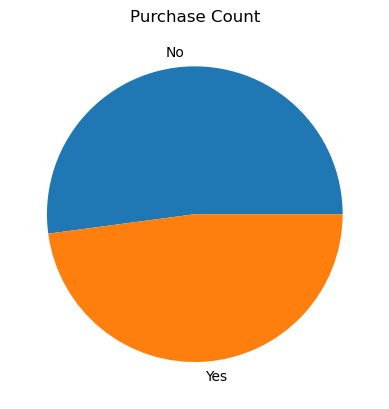

In [56]:
data["Purchased Bike"].value_counts().sort_values(ascending=False).plot(kind="pie")
plt.ylabel("")
plt.title("Purchase Count")
plt.show()

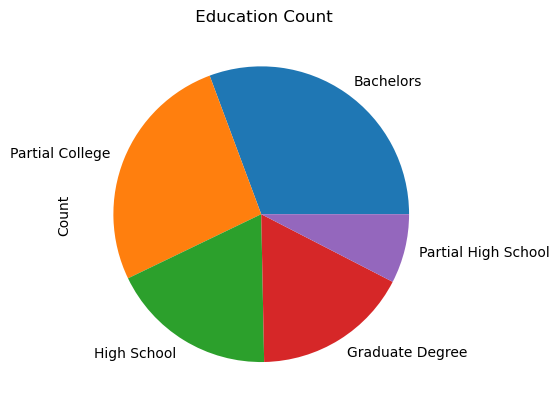

In [57]:
data["Education"].value_counts().sort_values(ascending=False).plot(kind="pie")
plt.ylabel("Count")
plt.title(" Education Count")
plt.show()

#### Grouping the columns

In [58]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No


In [59]:
data.groupby("Gender")["Income"].mean()

Gender
Female    54566.596195
Male      57223.382046
Name: Income, dtype: float64

In [60]:
data.groupby("Education")["Age"].mean()

Education
Bachelors              45.486301
Graduate Degree        44.742331
High School            44.341040
Partial College        43.079365
Partial High School    42.083333
Name: Age, dtype: float64

In [61]:
data.groupby(["Gender","Marital Status"])["Income"].mean()

Gender  Marital Status
Female  Married           56794.871795
        Single            52384.937238
Male    Married           59647.887324
        Single            53692.307692
Name: Income, dtype: float64

In [62]:
data.groupby("Purchased Bike")["Income"].mean()

Purchased Bike
No     54455.645161
Yes    57478.070175
Name: Income, dtype: float64

#### Feature Engineering

In [63]:
data["Purchased Bike"]=data["Purchased Bike"].apply(lambda x:1 if x=="Yes" else 0)

In [64]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,0
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,0
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,0
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,1
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,0


In [65]:
X = data[["Income","Age","Education","Home Owner"]]
y = data[["Purchased Bike"]]

In [66]:
X

,Income,Age,Education,Home Owner
0,40000.0,42.0,Bachelors,Yes
1,30000.0,43.0,Partial College,Yes
2,80000.0,60.0,Partial College,No
4,30000.0,36.0,Bachelors,No
5,10000.0,50.0,Partial College,Yes
...,...,...,...,...
994,80000.0,46.0,Partial College,Yes
995,60000.0,54.0,High School,Yes
996,70000.0,35.0,Graduate Degree,Yes
998,100000.0,38.0,Bachelors,No


In [67]:
y

,Purchased Bike
0,0
1,0
2,0
4,1
5,0
...,...
994,0
995,1
996,1
998,0


#### Label Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
X["Education"]=le.fit_transform(X["Education"])                      # Changing into the numeric values
X["Home Owner"]= le.fit_transform(X["Home Owner"])

In [70]:
X

,Income,Age,Education,Home Owner
0,40000.0,42.0,0,1
1,30000.0,43.0,3,1
2,80000.0,60.0,3,0
4,30000.0,36.0,0,0
5,10000.0,50.0,3,1
...,...,...,...,...
994,80000.0,46.0,3,1
995,60000.0,54.0,2,1
996,70000.0,35.0,1,1
998,100000.0,38.0,0,0


#### Train Test Split 

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [72]:
X_train.shape

(761, 4)

#### 1) Decision Tree Classifier based model training

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [74]:
param_grid={
            "splitter":["best","random"],
            "max_depth":[None,10,20,30,40,50],
            "min_samples_split":[2,5,10],
            "min_samples_leaf": [1,2,4]
}

In [75]:
tree_model= DecisionTreeClassifier()
grid_search_tree=GridSearchCV(tree_model,param_grid)

In [76]:
grid_search_tree.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [77]:
grid_search_tree.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_split=10, splitter='random')

In [78]:
pred_tree= grid_search_tree.predict(X_test)

In [ ]:
accuracy_score(y_test,pred_tree)                 # Accuracy Score of the model

#### 2) Random Forest Classifier based model training

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc_model= RandomForestClassifier()

In [81]:
param_grid_rfc={
                "max_features":[2,3,4],
                "n_estimators":[32,64,128,256]
               }

In [82]:
grid_rfc= GridSearchCV(rfc_model,param_grid_rfc)

In [83]:
grid_rfc.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [84]:
grid_rfc.best_params_

{'max_features': 2, 'n_estimators': 64}

In [85]:
pred_rfc=grid_rfc.predict(X_test)

In [ ]:
accuracy_score(y_test,pred_rfc)              # Accuracy score of the model

#### From the above observation both models have approximately same results.So, going with the 1st model i.e Decison tree

In [87]:
grid_search_tree

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [88]:
import joblib
joblib.dump(grid_search_tree,"model.pkl")

['model.pkl']

In [89]:
X.columns

Index(['Income', 'Age', 'Education', 'Home Owner'], dtype='object')